In [1]:
from platform import python_version
print("Versão usada:", python_version())

Versão usada: 3.9.12


In [2]:
#Importações

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#Carregando os dados

dados = pd.read_csv('dataset.csv')
dados.head()


,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [4]:
dados.shape

(500, 5)

In [5]:

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


### Analise Exploratória de Dados

In [6]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [7]:
# Análise de correlãção

dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


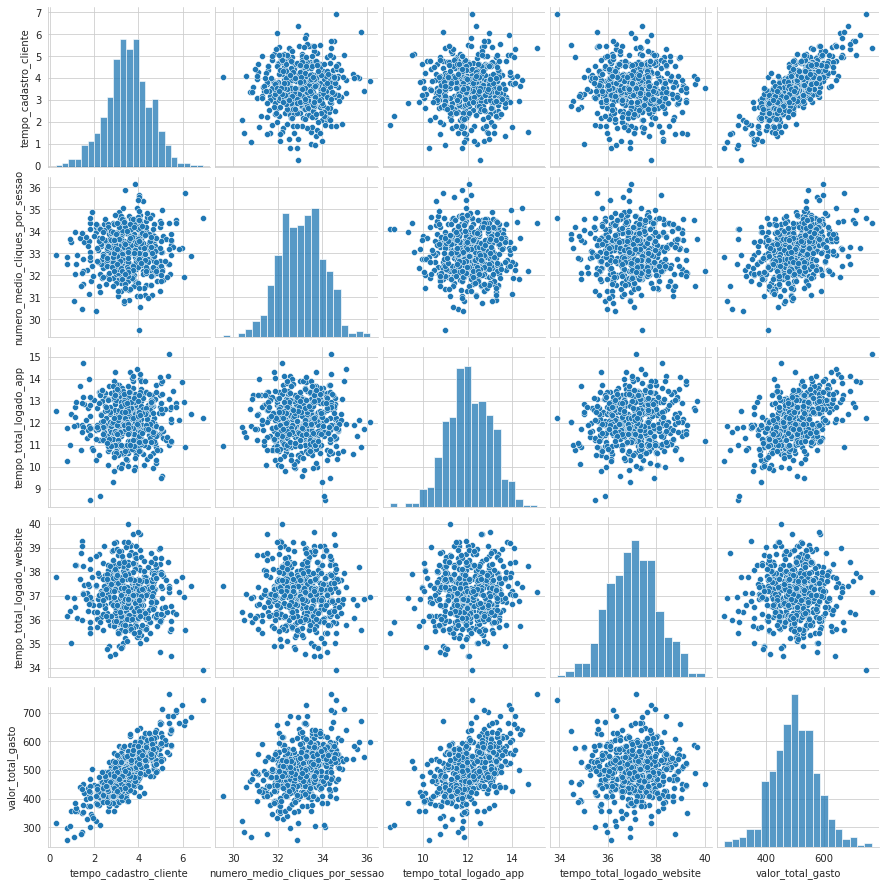

In [9]:
sns.pairplot(dados);

In [10]:
# Olhando para a análise univariada (diagonal) vemos que todas as variáveis seguem uma distribuição normal, o que 
# fundamental para a utilização de um modelo de regressão.

# O ideal aqui é fazer uma análise gráfica por grupos de variáveis

#### Análise 1: Relação entre Relação Entre Tempo no Web Site e Valor Gasto

<Figure size 1296x864 with 0 Axes>

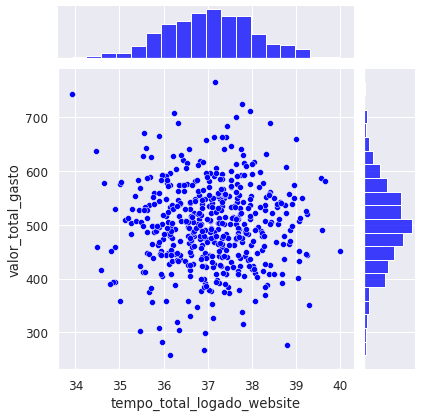

In [12]:
plt.figure(figsize=(18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data=dados, # jointplot junta o histograma e o gráfico de dispersão na mesma área de plotagem.
             x = 'tempo_total_logado_website', 
             y = 'valor_total_gasto',
             color= 'blue');

In [13]:
# Observa-se que não correlação entre essas variáveis (vide o gráfico de dispersão)

# Confirmando:

dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


#### Análise 2 - Relação Entre Tempo na App e Valor Gasto

<Figure size 1296x864 with 0 Axes>

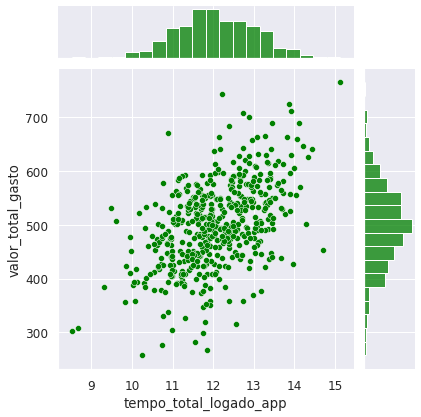

In [14]:
plt.figure(figsize=(18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data=dados,
             x = 'tempo_total_logado_app',
             y = 'valor_total_gasto',
             color = 'green');

In [15]:
# Neste caso há uma correlação positiva entre o tempo logado na app e o valor gasto.
# Podemos deduzir que se aumentarmos o tempo gasto na app teremos um aumento de gastos por parte do cliente.

# Confirmando:

dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


#### Análise 3 - Relação Entre Tempo na App e Tempo de Cadastro

<Figure size 1296x864 with 0 Axes>

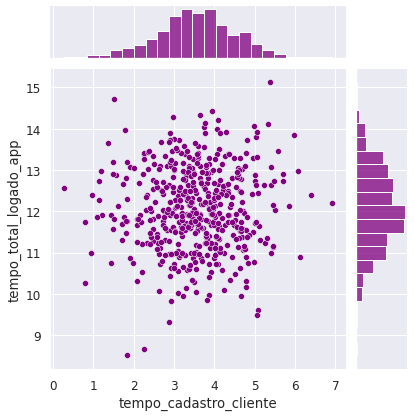

In [16]:
plt.figure(figsize=(18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data=dados,
             y= 'tempo_total_logado_app',
             x = 'tempo_cadastro_cliente',
             color = 'purple');

In [17]:
# Em regressão é desejado que as variáveis preditoras tenham uma forte relação com variável target.
# Entretando não é desejado uma alta correlação entre as variáveis preditoras (multicolinearidade)

#### Análise 4 - Relação Entre Tempo de Cadastro e Valor Gasto

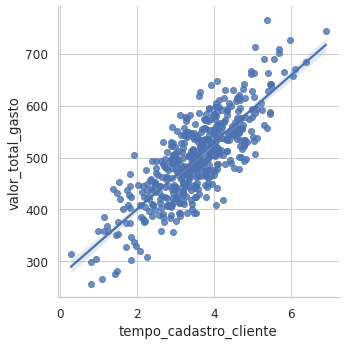

In [18]:
#Criando um modelo de regressão:

sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y = "valor_total_gasto", x = "tempo_cadastro_cliente",
          data=dados);

In [19]:
#Comprovando a correlação:

dados[["valor_total_gasto","tempo_cadastro_cliente"]].corr()

,valor_total_gasto,tempo_cadastro_cliente
valor_total_gasto,1.000000,0.809084
tempo_cadastro_cliente,0.809084,1.000000


In [20]:
#Observa-se uma relação muito forte entre as variáveis.

# Ou seja, clientes mais antigos tendem a gastar mais!

# Outro ponto é notar a fina sombra ao redor da linha de regressão, isso implica que o erro entre a estimativa
# (linha) e os dados reais (pontos) é muito pequeno.

#### Análise 5 - Relação Entre Tempo Logado na App e Tempo Logado no Web Site

<Figure size 1296x864 with 0 Axes>

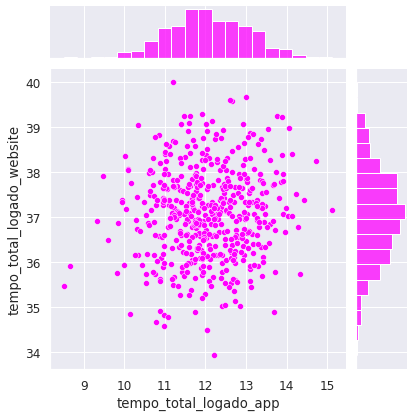

In [21]:
plt.figure(figsize=(18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data=dados,
             x = 'tempo_total_logado_app',
              y = 'tempo_total_logado_website',
              color = 'magenta' );

In [22]:
# Como era de se esperar não nenhum tipo de correlação entre essas variáveis.
# O que faz sentido, pois o cliente está logado no website ou no app.

### Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [23]:
# Nesta parte separamos os dados entre treino e teste:

dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [24]:
#Variáveis preditoras
X = dados[['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',]]

In [25]:
#Variável target
y = dados['valor_total_gasto']

In [30]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                       test_size= 0.3, 
                                                       random_state= 101)

In [31]:
len(X_treino)

350

In [32]:
len(X_teste)

150

#### Padronização

In [33]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [34]:
# Criando o objeto padronizador
sc = StandardScaler()

In [35]:
# Treinando o objeto padronizador

sc.fit(X_treino)

StandardScaler()

In [36]:
X_treino = sc.transform(X_treino)

In [37]:
X_teste = sc.transform(X_teste)

In [38]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

### Construção, Treinamento e Avaliação do Modelo 1 com Regressão Linear (Benchmark)

In [39]:
#Cria o base model

modelo_v1 = LinearRegression()

In [40]:
# Treina o modelo
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [42]:
# Imprimindo os coeficientes:

print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [43]:
# Colocando esses coeficientes em um df
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns=['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


In [44]:
# Podemos observar que o coeficiente da variável tempo_cadastro_cliente é o maior de todos. Lembrando que essa 
#variável é a que possui maior correlação com a variável target.
# Do mesmo modo observamos que a variável tempo_total_logado_website possui o menor coeficiente, essa variável
# é a que possui a menor correlação com variável target.

In [45]:
# Fazendo previsões:
prev_v1 = modelo_v1.predict(X_teste)

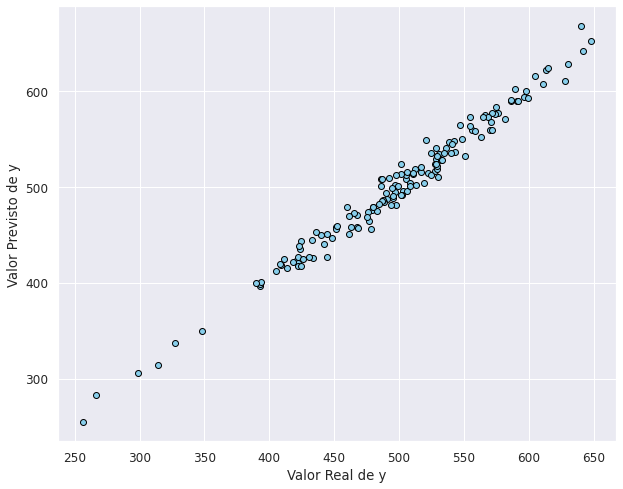

In [46]:
# Podemos agora plotar os valores preditos e os valores reais

plt.figure(figsize=(10,8))
plt.scatter(x = y_teste, y = prev_v1, color = 'skyblue', edgecolors='black')
plt.xlabel('Valor Real de y')
plt.ylabel('Valor Previsto de y');

In [47]:
# Observa-se que existe um relacionamento muito forte entre os valores previstos e os reais.
# Isso indica uma boa taxa de acerto do modelo.

#### Métricas

In [49]:
 #Valor médio gasto pelos clientes
dados['valor_total_gasto'].mean()

499.31403826080003

In [50]:
# Valor mínimo
dados['valor_total_gasto'].min()

256.6705823

In [51]:
# Valor máximo
dados['valor_total_gasto'].max()

765.5184619

In [53]:
# MAE- Erro Médio Absoluto 
mean_absolute_error(y_teste, prev_v1)
#O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) 
#estão erradas em aproximadamente 7,76 reais, o que é um valor pequeno comparado ao valor médio gasto por cliente.

7.762418645778977

In [54]:
# MSE - Erro quadrático médio

mean_squared_error(y_teste, prev_v1)

94.95654308438662

In [55]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, prev_v1))

9.744564797074656

In [56]:
# O RMSE prevê que, em média, as previsões do nosso modelo (de valores gastos) 
#estão erradas em aproximadamente 9.74, que é um valor pequeno comparado ao valor médio gasto por cliente.

In [57]:
#Coeficiente R2
r2_score(y_teste, prev_v1)

0.9813622791776302

In [58]:
# O R2 é uma medida de ajuste de um modelo estatístico linear generalizado, 
#como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória.
# Quanto mais próximo de 1 melhor.

In [60]:
# Variância Explicada
explained_variance_score(y_teste, prev_v1)

0.9817449183428639

In [61]:
#Nosso modelo é caapz de explicar 98% da variância dos dados, o que é excelente.
# O coeficiente R2 de 98% e as outras métricas, demonstram que este é um modelo muito bom.

#### Resíduos

In [62]:
# Uma das premissas básicas para um modelo de regressão é que o resíduo siga uma distribuição (aproximadamente)
# normal.

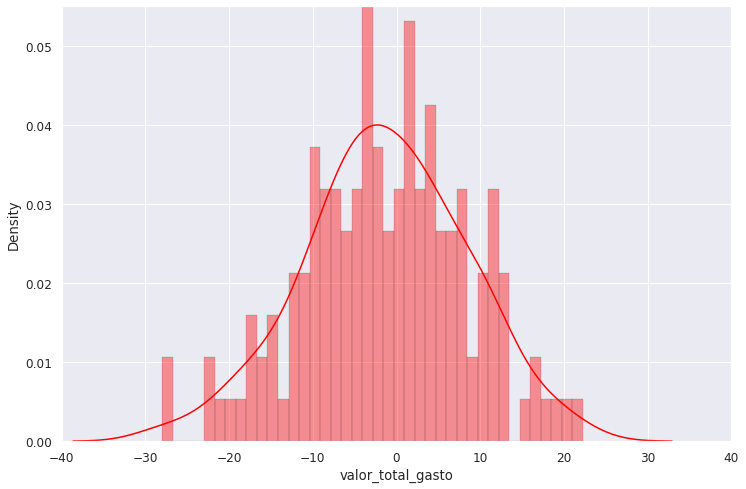

In [68]:
plt.figure(figsize=(12,8))
ax = sns.distplot((y_teste - prev_v1),
           bins = 40,
           color= 'red',
           hist_kws = dict(edgecolor ='black', linewidth = 0.3))
ax.set(xlim =(-40,40))
ax.set(ylim = (0, 0.055));

In [69]:
# A distribuição dos resíduos apresenta uma forma normal.

### Construção, Treinamento e Avaliação do Modelo 2 com Regressão Ridge


In [70]:
# Cria o modelo
modelo_v2 = Ridge(alpha = 1.0)

In [71]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [72]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [73]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


In [74]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)

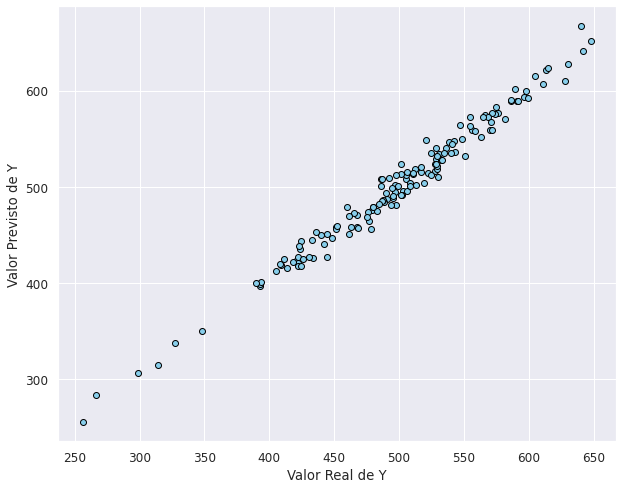

In [75]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [76]:
# MAE
mean_absolute_error(y_teste, pred_v2)

7.764151148981961

In [77]:
# MSE
mean_squared_error(y_teste, pred_v2)

94.9373160249346

In [78]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

9.743578194120197

In [80]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.9817472659016085

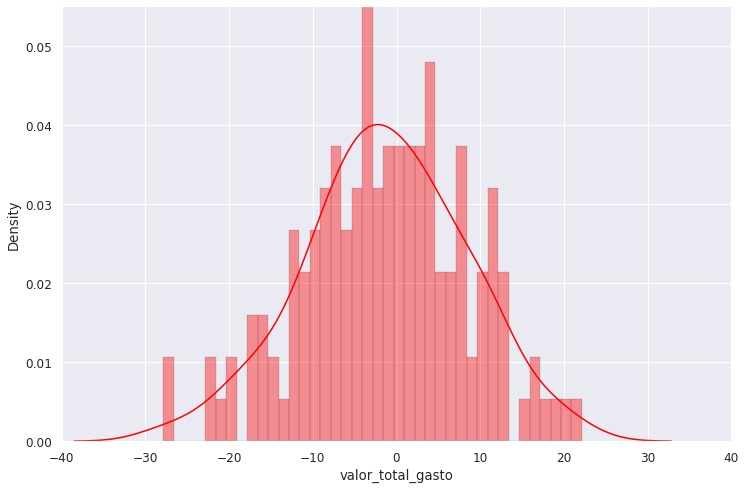

In [82]:
# Plot
plt.figure(figsize = (12,8))
ax = sns.distplot((y_teste - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

In [83]:
# Com o modelo 2 temos basicamente as mesmas métricas e característica do base model.

### Construção, Treinamento e Avaliação do Modelo 3 com Regressão LASSO

In [84]:
# Cria o modelo
modelo_v3 = Lasso(alpha = 1.0)

In [85]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [86]:
print('Coeficientes: \n', modelo_v3.coef_)

Coeficientes: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [87]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


In [88]:
# Previsões com dados de teste
pred_v3 = modelo_v3.predict(X_teste)

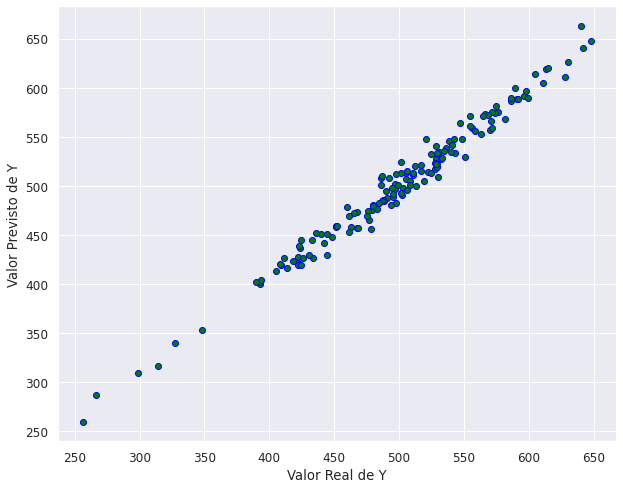

In [89]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [90]:
# MAE
mean_absolute_error(y_teste, pred_v3)

7.788504696951062

In [91]:
# MSE
mean_squared_error(y_teste, pred_v3)

96.05606348970664

In [92]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

9.800819531534424

In [93]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [94]:
# Variância Explicada
explained_variance_score(y_teste, pred_v3)

0.9815600649101045

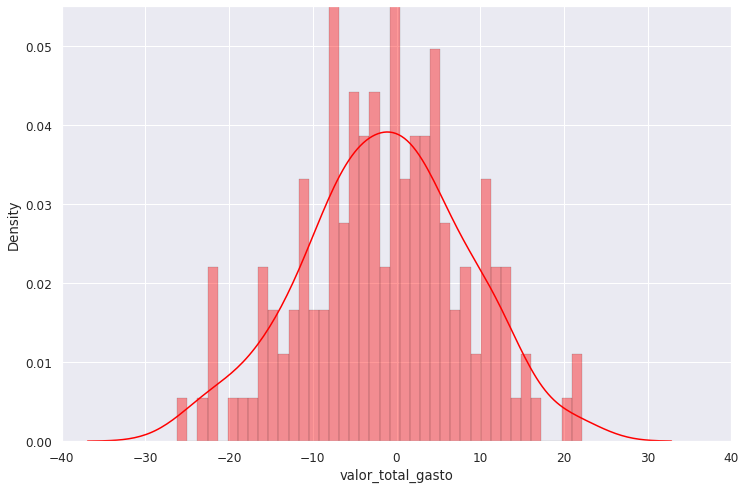

In [96]:
# Plot
plt.figure(figsize = (12,8))
ax = sns.distplot((y_teste - pred_v3), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

### Seleção do Modelo

In [97]:
# O modelo 3 apresentou uma taxa de erro (RMSE) levemente maior e pode ser descartado. 
# Os modelos 1 e 2 ficaram muito próximos e nesse caso devemos escolher o modelo mais simples, que em nosso exemplo é o modelo 1.

### Conclusão

In [98]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [99]:
# Coeficientes
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


#### Interpretações dos Coeficientes:

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63.74 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$ 26.24 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R$ 38.57 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no web site está associado a um aumento de R$ 0.68 no valor total gasto por cliente por mês.

Podemos ver que será mais lucrativo para a empresa investir na atualização da sua app uma vez que o retorno será maior. Além disso, é importante criar políticas para reter o cliente por mais tempo, já que isso também leva ao aumento das vendas. A própria atualização da app será uma forma de reter o cliente por mais tempo.

Não compensa, neste momento, investir na atualização do web site pois o retorno será mínimo.

#### O mais interessante neste projeto é que o objetivo não era estimar valores de gastos precisamente, mas sim descobrir como 
#### os dados se relacionam, o que os coefientes podem contribuir para a solução de um problema de negócios.


### Fim do Projeto